In [8]:
library(Seurat)
library(ggplot2)
library(dplyr)
source('../src/seurat_helpers.R')


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Load data

## Option 1. Load and pre-process data from h5 files from cellranger

In [ ]:
library(hdf5r)

In [7]:
metadata = read.csv('samples.csv', stringsAsFactors=F)
metadata

filename,id,prefix,timepoint
10X_19_001.filtered_feature_bc_matrix.h5,R30_w85,R30_w8.5,8
10X_19_063.filtered_feature_bc_matrix.h5,R39_w95,R39_w9.5,9
10X_19_088.filtered_feature_bc_matrix.h5,R43_w60,R43_w6,6
10X_19_123.filtered_feature_bc_matrix.h5,R48a_w145,R48a_w14.5,14
10X_19_124.filtered_feature_bc_matrix.h5,R48b_w120,R48b_w12,12
10X_19_125.filtered_feature_bc_matrix.h5,R48c_w85,R48c_w8.5,8
10X_20_005.filtered_feature_bc_matrix.h5,R53a_w95,R53a_w9.5,9
10X_20_006.filtered_feature_bc_matrix.h5,R53b_w115,R53b_w11.5,11
10X_20_007.filtered_feature_bc_matrix.h5,R53c_w95,R53c_w9.5,9


In [ ]:
adrenal_whole = new.env()

l_SR = list()
for(i in 1:nrow(metadata)){
    print(metadata$filename[i])
    SR_data = Read10X_h5(paste0('../data/h5/', metadata$filename[i]))
    l_SR[[i]] = CreateSeuratObject(counts = SR_data, project = metadata$id[i], min.cells = 3, min.features = 200)
    l_SR[[i]]@meta.data$timepoint = metadata$timepoint[i]
}

adrenal_whole$SR <- merge(l_SR[[1]], y = l_SR[2:length(l_SR)], 
                    add.cell.ids = metadata$prefix, project = "adrenal")

rm(SR_data, l_SR)
gc()

adrenal_whole$SR

In [ ]:
do_seurat_regress(adrenal_whole)

Computing nearest neighbor graph
Computing SNN


Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 72571
Number of edges: 1615538

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9821
Number of communities: 42
Elapsed time: 6 seconds


Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”

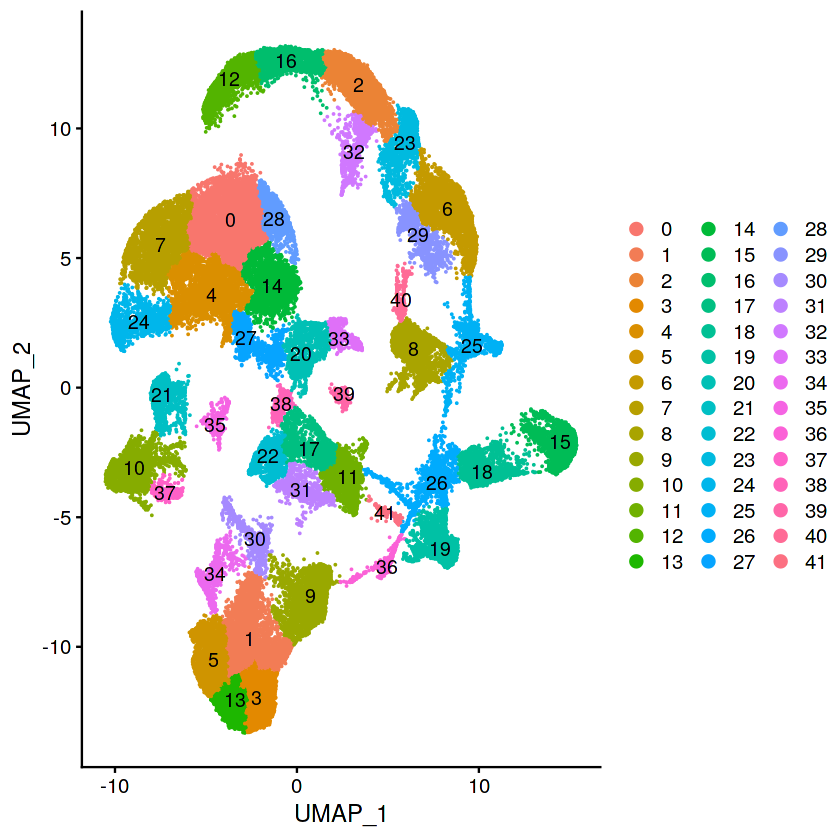

In [15]:
# Find clusters based on UMAP embedding

with(adrenal_whole, {
    SR <- FindNeighbors(SR, reduction = "umap", dims=1:2)
    SR <- FindClusters(SR, resolution = 0.3)
    plot(DimPlot(SR, reduction = "umap", label=T))
})

## Option 2. Load pre-processed Seurat object

In [4]:
adrenal_whole = new.env()
adrenal_whole$SR = readRDS('../data/Seurat/adrenal.human.seurat.rds')

In [5]:
adrenal_whole$SR@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,RNA_snn_res.0.3,RNA_snn_res.1.5,fate,timepoint
R30_w8.5_AAACCCAAGAGATGCC,R30_w85,19142,4377,9.0115975,1,0,0,60,cortex,8
R30_w8.5_AAACCCAAGATTGTGA,R30_w85,14516,3873,2.8175806,14,20,20,37,kidney,8
R30_w8.5_AAACCCAAGGATACGC,R30_w85,8325,2598,4.8048048,2,11,11,28,mesenchyme,8
R30_w8.5_AAACCCACAAAGGCTG,R30_w85,3112,1654,2.3457584,0,3,3,12,endothelium,8
R30_w8.5_AAACCCACACGCTGTG,R30_w85,11905,3216,16.8584628,1,28,28,23,cortex,8
R30_w8.5_AAACCCACAGAGGCAT,R30_w85,16540,4460,6.9588875,11,14,14,0,cortex,8
R30_w8.5_AAACCCAGTATCGAAA,R30_w85,3218,220,1.0254817,3,12,12,10,erythroid,8
R30_w8.5_AAACCCATCATTTCGT,R30_w85,1917,988,9.0766823,18,8,8,18,HSC_and_immune,8
R30_w8.5_AAACCCATCCGGCAGT,R30_w85,9736,3175,5.4642564,14,20,20,52,kidney,8
R30_w8.5_AAACGAACACATAGCT,R30_w85,8780,589,0.1936219,3,16,16,24,erythroid,8


In [14]:
unique(adrenal_whole$SR@meta.data$fate)

[1] "cortex"                "kidney"                "mesenchyme"           
 [4] "endothelium"           "erythroid"             "HSC_and_immune"       
 [7] "medulla"               "melanocytes"           "intermediate_mesoderm"
[10] "liver"

# Quality control: Genes per cell, UMIs per cell

In [10]:
scstat = data.frame(adrenal_whole$SR@meta.data)
scstat$rank_nCount_RNA = 0
scstat$rank_nFeature_RNA = 0
for(fate in unique(scstat$orig.ident)){
    scstat$rank_nCount_RNA[scstat$orig.ident==fate] = rank(0-scstat$nCount_RNA[scstat$orig.ident==fate])
    scstat$rank_nFeature_RNA[scstat$orig.ident==fate] = rank(0-scstat$nFeature_RNA[scstat$orig.ident==fate])
}
head(scstat)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.5,seurat_clusters,RNA_snn_res.0.3,RNA_snn_res.1.5,fate,timepoint,rank_nCount_RNA,rank_nFeature_RNA
R30_w8.5_AAACCCAAGAGATGCC,R30_w85,19142,4377,9.011598,1,0,0,60,cortex,8,988.0,1067.0
R30_w8.5_AAACCCAAGATTGTGA,R30_w85,14516,3873,2.817581,14,20,20,37,kidney,8,1778.0,1725.0
R30_w8.5_AAACCCAAGGATACGC,R30_w85,8325,2598,4.804805,2,11,11,28,mesenchyme,8,3777.5,3753.0
R30_w8.5_AAACCCACAAAGGCTG,R30_w85,3112,1654,2.345758,0,3,3,12,endothelium,8,6021.0,5059.0
R30_w8.5_AAACCCACACGCTGTG,R30_w85,11905,3216,16.858463,1,28,28,23,cortex,8,2445.0,2769.5
R30_w8.5_AAACCCACAGAGGCAT,R30_w85,16540,4460,6.958888,11,14,14,0,cortex,8,1381.0,973.5


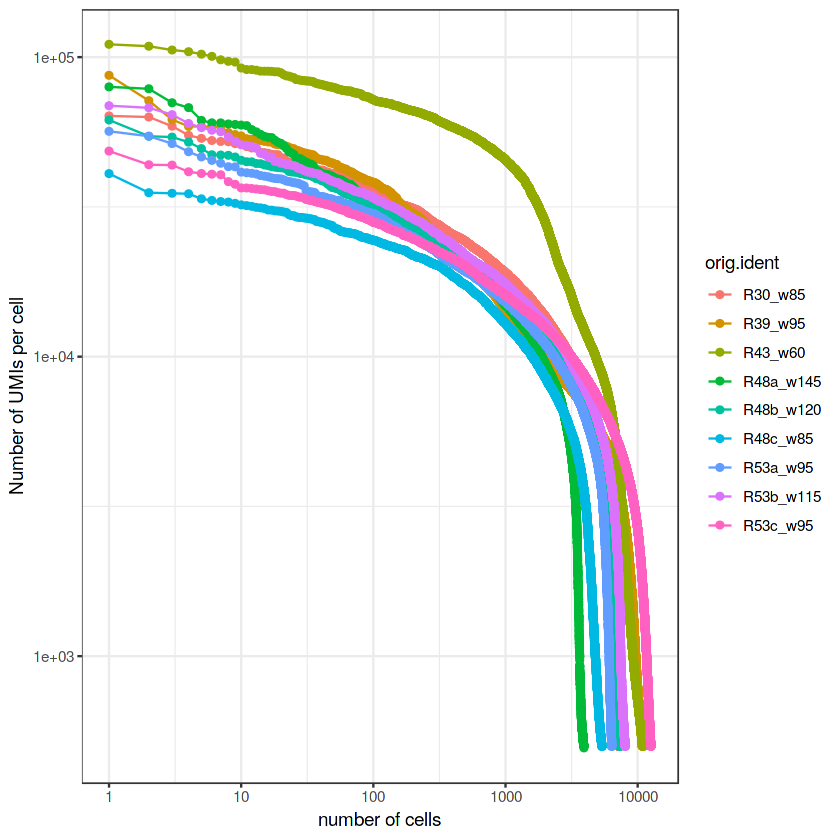

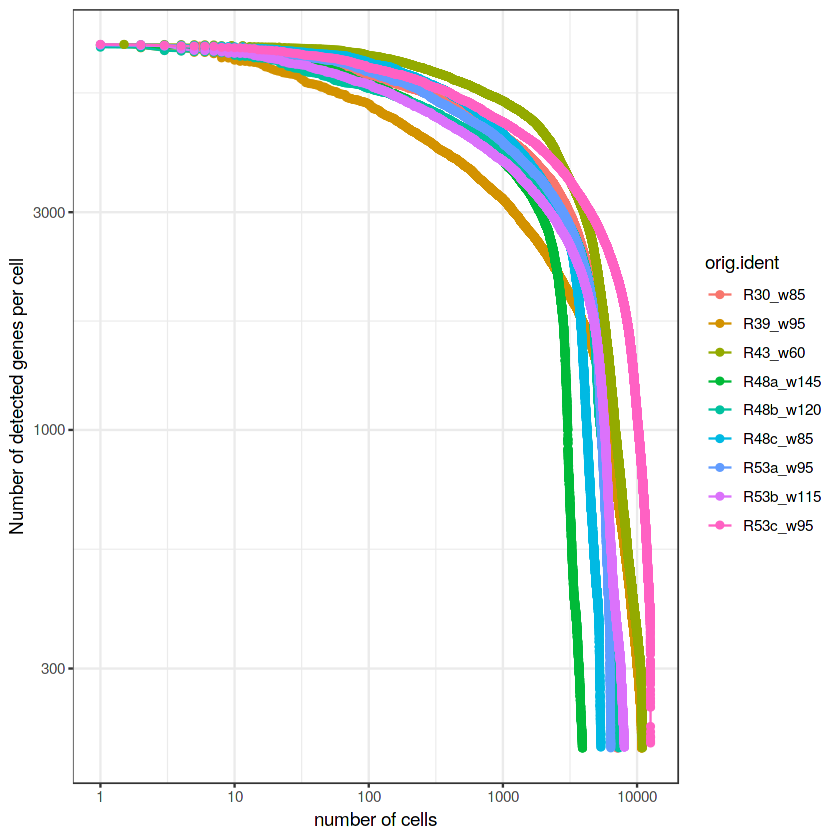

In [13]:
# Number of UMIs per cell
p = ggplot(scstat, aes(x=rank_nCount_RNA, y=nCount_RNA, col=orig.ident)) + geom_line() + geom_point() +
    scale_x_continuous(trans = 'log10') + scale_y_continuous(trans = 'log10') + theme_bw() +
    xlab('number of cells') + ylab('Number of UMIs per cell')
p

#ggsave(paste0('figures/figS4_QC/cumulative_nCount_RNA.png'), width=5, height=5, dpi=320)
#ggsave(paste0('figures/figS4_QC/cumulative_nCount_RNA.nolegend.png'), plot = p+NoLegend(), width=5, height=5, dpi=320)

# Number of detected genes per cell
p = ggplot(scstat, aes(x=rank_nFeature_RNA, y=nFeature_RNA, col=orig.ident)) + geom_line() + geom_point() +
    scale_x_continuous(trans = 'log10') + scale_y_continuous(trans = 'log10') + theme_bw() +
    xlab('number of cells') + ylab('Number of detected genes per cell')

p

#ggsave(paste0('figures/figS4_QC/cumulative_nFeature_RNA.png'), width=5, height=5, dpi=320)
#ggsave(paste0('figures/figS4_QC/cumulative_nFeature_RNA.nolegend.png'), plot = p+NoLegend(), width=5, height=5, dpi=320)

In [ ]:
#Doublet score

with(adrenal_whole, {
    ds = list()
    for(samp in unique(SR@meta.data$orig.ident)){
        print(samp)
        ds[[samp]] = get.scrublet.scores(SR[, SR@meta.data$orig.ident == samp]@assays$RNA@counts)
    }
    
    SR@meta.data$scrublet_score = rep(NA, ncol(SR))
    
    for(samp in unique(SR@meta.data$orig.ident)){
        print(samp)
        SR@meta.data$scrublet_score[SR@meta.data$orig.ident == samp] = ds[[samp]]
    }
})

FeaturePlot(adrenal_whole$SR, 'scrublet_score')

# UMAP embeddings, clusters and fates

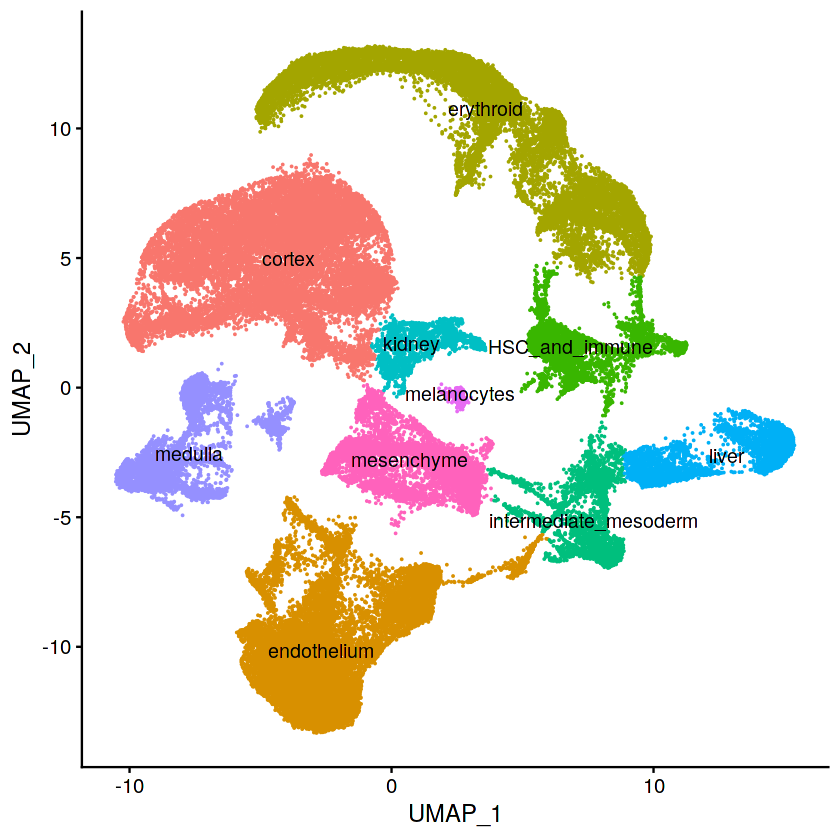

In [17]:
# Assigning clusters to fates

l_cluster_annotation = list(c(11,31,22,17,38), 
                            c(20,33),
                            c(27,14,4,24,0,7,28), 
                            c(35,21,10,37),
                            c(36,9,30,34,1,5,3,13),
                            c(18,15),
                            c(26,19,41),
                            c(25,8,40),
                            c(6,29,23,32,2,16,12),
                            39
                       )
names(l_cluster_annotation) = c('mesenchyme', 'kidney', 'cortex', 'medulla', 'endothelium', 'liver',
                               'intermediate_mesoderm', 'HSC_and_immune', 'erythroid', 'melanocytes')

adrenal_whole$SR@meta.data$fate = 'other'

for(i in 1:length(l_cluster_annotation)){
    adrenal_whole$SR@meta.data$fate[adrenal_whole$SR@meta.data$seurat_clusters %in% l_cluster_annotation[[i]] ] = names(l_cluster_annotation)[i]
}

DimPlot(adrenal_whole$SR, reduction = "umap", label=T, group.by = 'fate')+NoLegend()

Warning message in FetchData(object = object, vars = features):
“The following requested variables were not found: HBA”

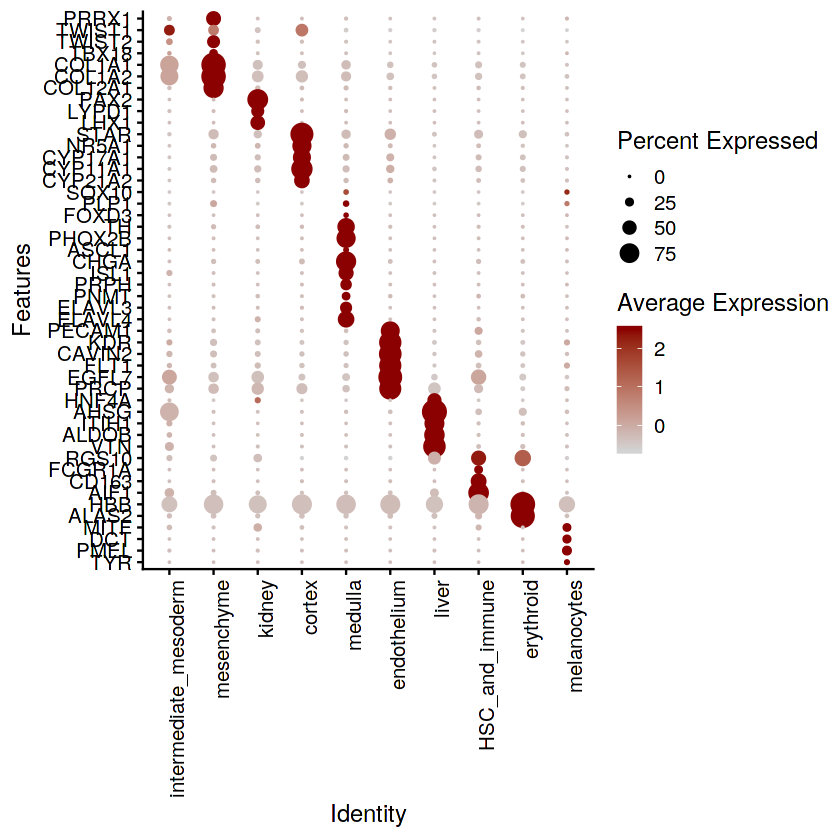

In [33]:
markers_txt = 'Prrx1, Twist1, Twist2, Tbx18, Col1a1, Col1a2, Col12a1,
Pax2, Lypd1, Lhx1,
Star, Nr5a1, Cyp17a1, Cyp11a1, Cyp21a2
Sox10, Plp1, FoxD3,
Th, Phox2b, Ascl1, Chga, Isl1, Prph, Pnmt, Elavl3, Elavl4,
Pecam1, Kdr, Cavin2, Flt1, Egfl7, Prcp
Hnf4a, Ahsg, Itih1, Aldob, Vtn
HBA, Rgs10, Fcgr1a, CD163, Aif1
HBB, Alas2,
Mitf, Dct, Pmel, Tyr'

markers = toupper(strsplit(markers_txt, '[[:space:],\n]+')[[1]])

with(adrenal_whole, {
    fate_ordering = c('intermediate_mesoderm', 'mesenchyme', 'kidney', 'cortex', 'medulla', 'endothelium', 'liver',
                               'HSC_and_immune', 'erythroid', 'melanocytes')

    SR@meta.data$fate2 = factor(SR@meta.data$fate, levels=fate_ordering)
})


DotPlot(adrenal_whole$SR, features = unique(markers), group.by='fate2', cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))
#ggsave('figures/fig1/dotplot_clusters.selgenes.6x11.pdf', width=6,height=11)

# Dotplot: fate markers

In [ ]:
with(adrenal_whole, {
    Idents(SR) ='fate'

    SR.markers.AUC <- FindAllMarkers(SR, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25,
                                    test='roc'
                                    )
    library(dplyr)
    top10.AUC <- SR.markers.AUC %>% group_by(cluster) %>% top_n(n = 10, wt = myAUC)
    top5.AUC <- SR.markers.AUC %>% group_by(cluster) %>% top_n(n = 5, wt = myAUC)
})

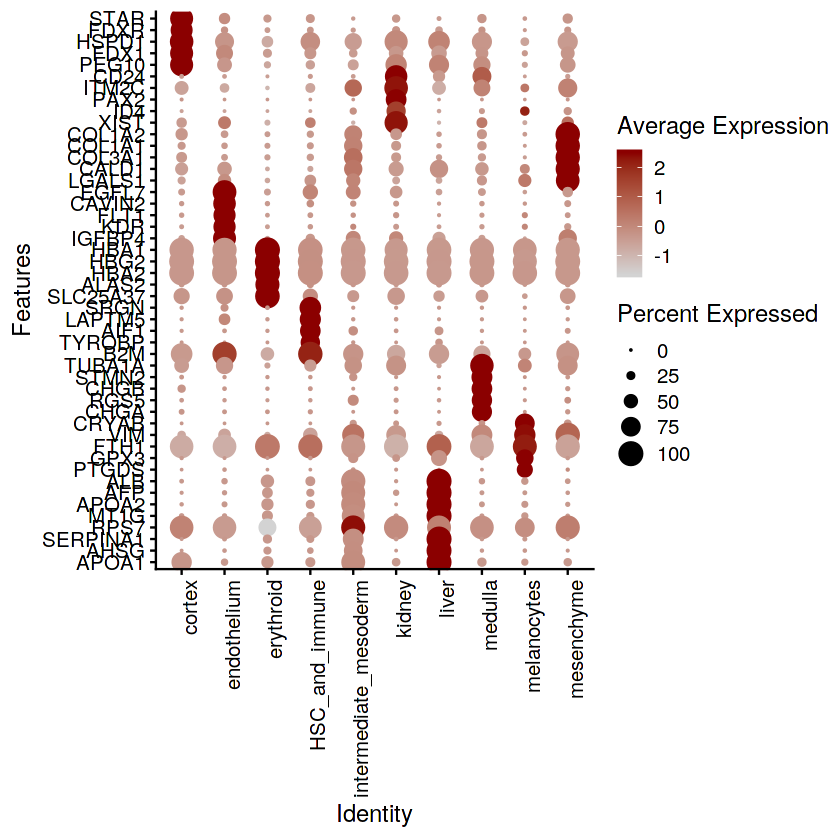

In [40]:
DotPlot(adrenal_whole$SR, features = unique(adrenal_whole$top5.AUC$gene), group.by='fate', cols = c("lightgrey", "darkred"))+
         coord_flip()+theme(axis.text.x = element_text(angle = 90, hjust = 1))

In [19]:
markers = c('GATA4', 'HAND2', 
            'TTR','AFP','APOA1',
            'MPO', 'AZU1',
           'NR4A2', 'SPINK2',
           'HBA2', 'HBB',
           'TNNT1', 'UPK3B',
           'KDR', 'PECAM1', 
                    'NTS', 'STAB2',
           'COL1A2', 'DCN','MEST', 'ACTA2',
           'LHX1', 'LYPD1', 'PAX2',
           'MPZ', 'PLP1', 'SOX10',
           'STAR', 'CYP17A1', 'SULT2A2','NOV',
           'PNMT', 'TH', 'CHGA', 'STMN2',
           'MKI67')

[1] "NOV"
[1] "PNMT"


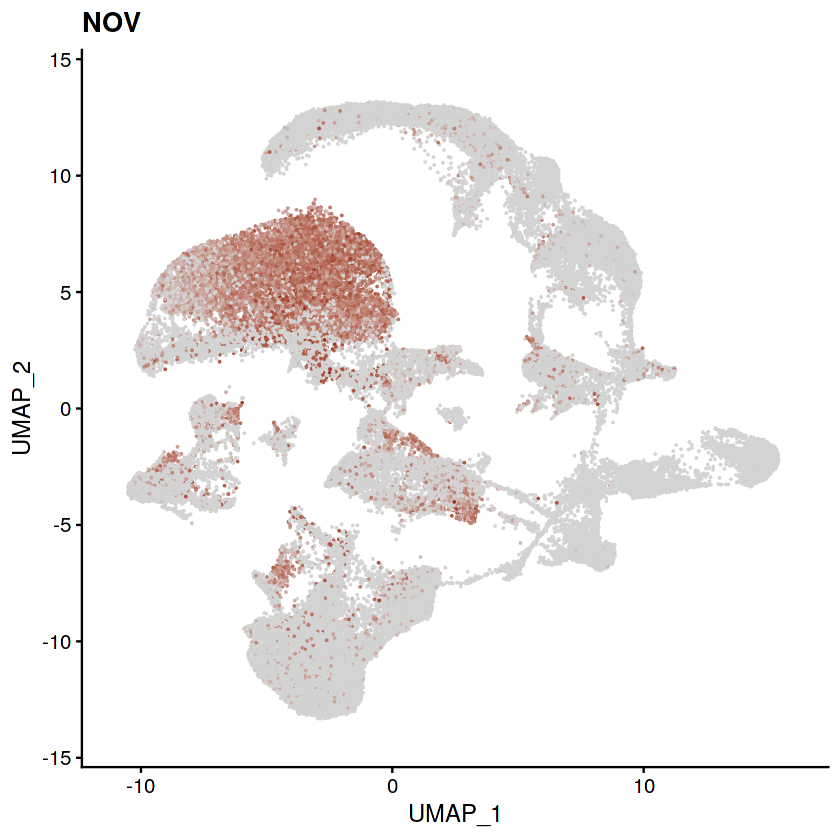

[1] "TH"


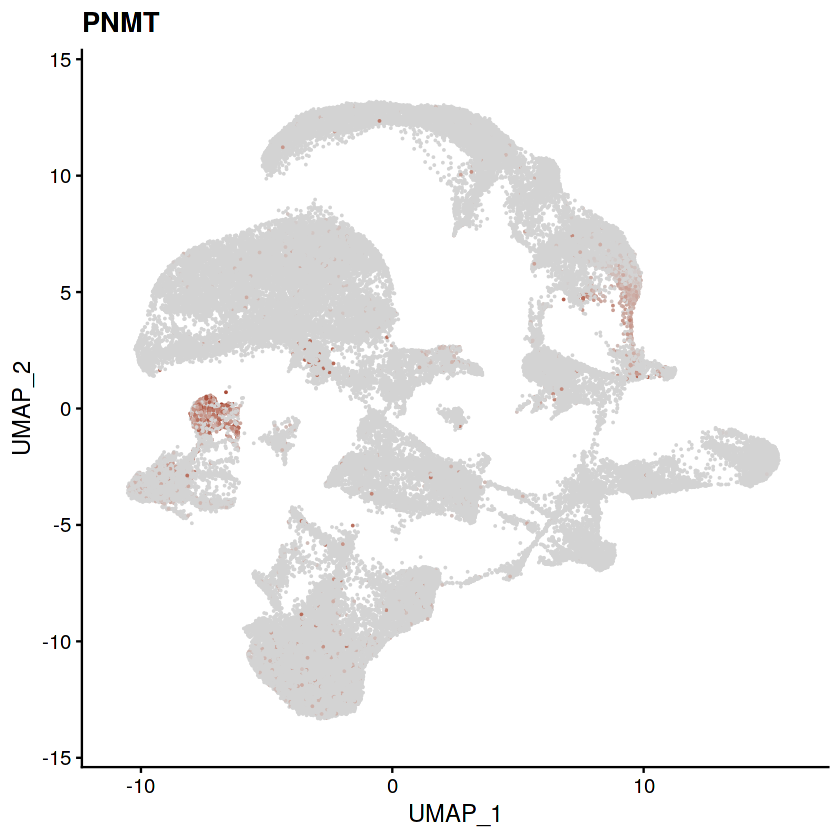

[1] "CHGA"


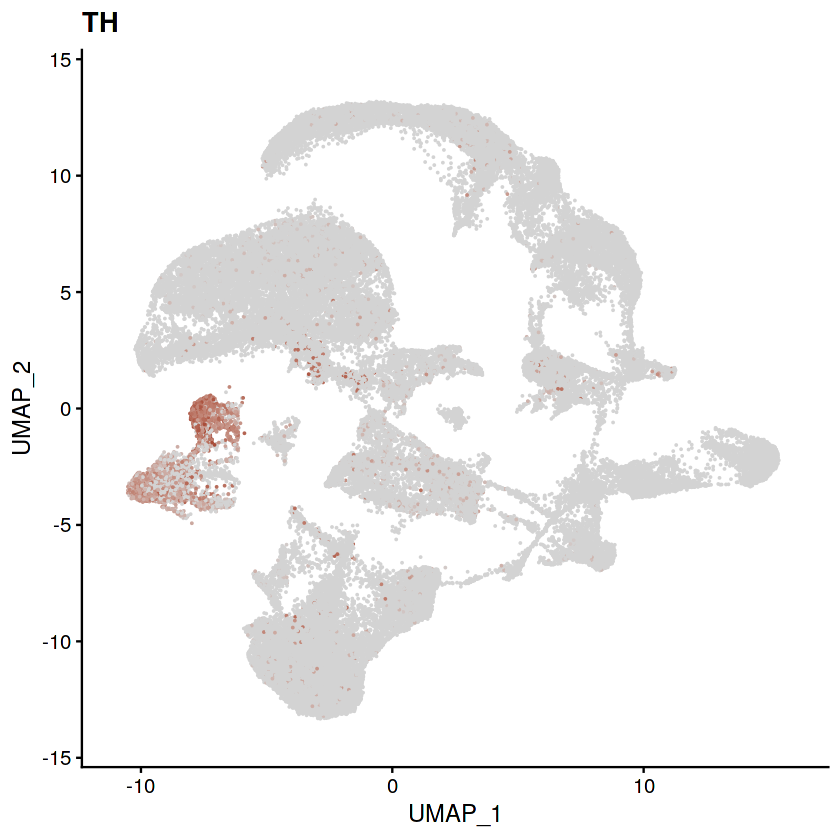

[1] "STMN2"


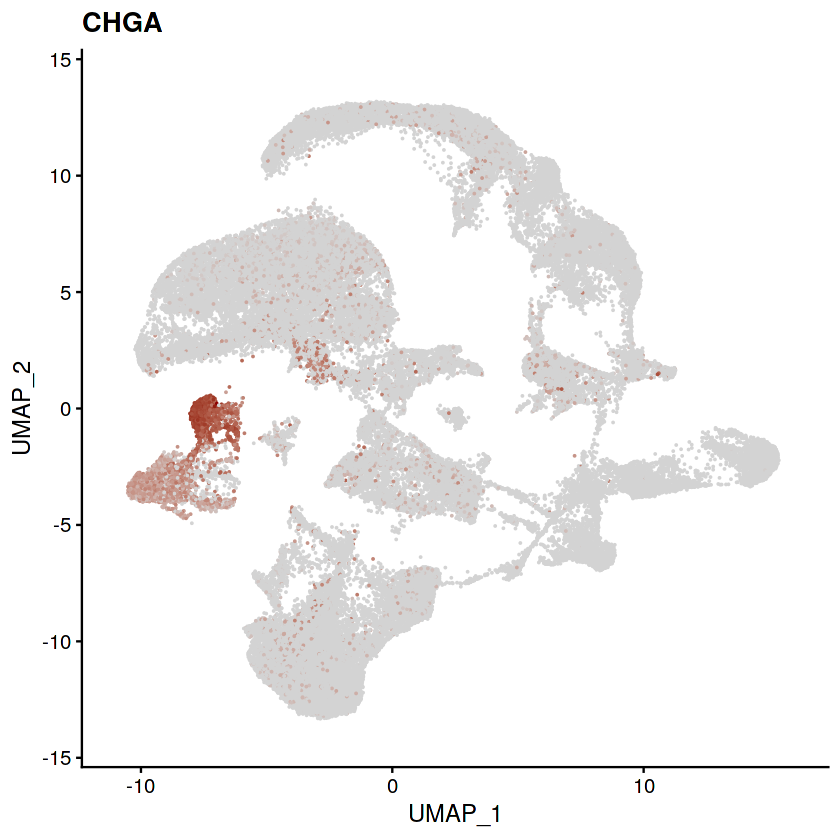

[1] "MKI67"


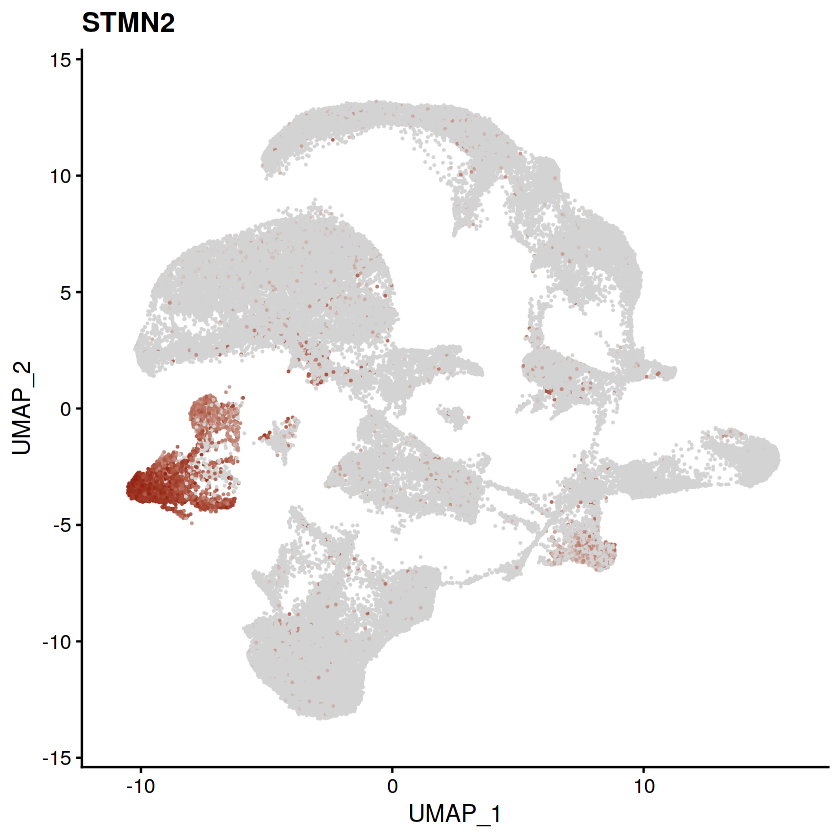

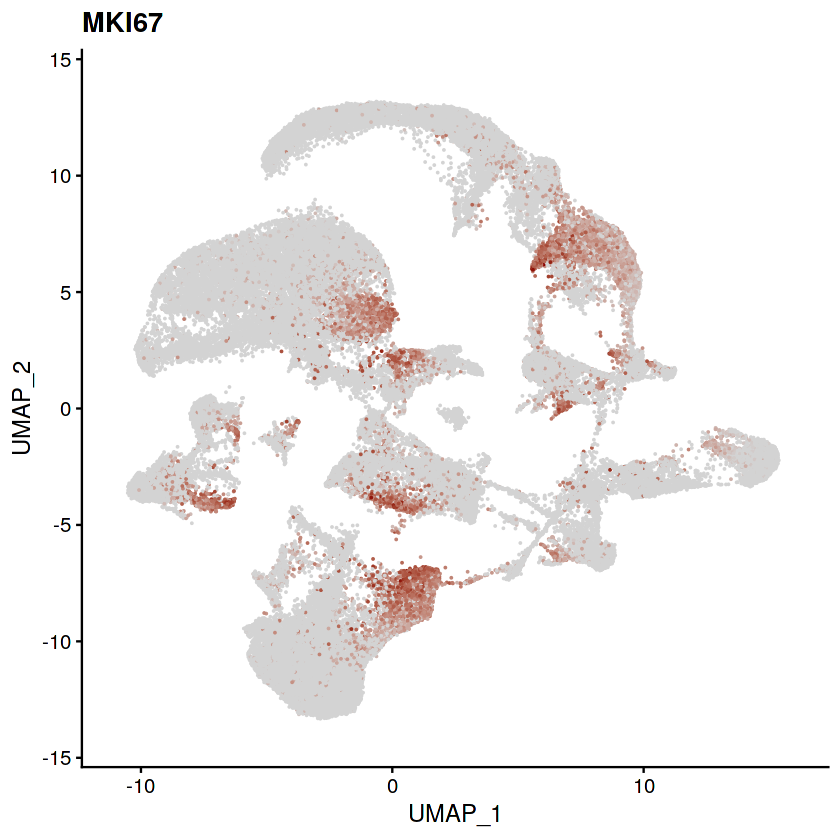

In [22]:
for(marker in tail(markers)){
    print(marker)
    p = FeaturePlot(adrenal_whole$SR, feature=marker, cols = c("lightgrey", "darkred")) +NoLegend() #pt.size = 0.1,
    plot(p)
    #ggsave(paste0('figures/fig1/004.adrenal_whole.marker.',marker,'.png'), width=5, height=5, dpi=320)
}

# Survival plots: signatures from the markers of major fates

In [23]:
genes_cell_cycle = toupper(read.csv('../data/cell_cycle_genes.csv')$gene)

In [27]:
dat=readRDS('../data/bulk_survival/GSE49711.dat.rds')

exp=dat$dat
ano=dat$ano

ano$time=as.numeric(ano$OS)
ano$vital_status=ano$OS.event
ano$inss=ano$inss.stage

index=ano$inss!='4S'
ano=ano[index,]
exp=exp[,index]

In [29]:
source('../src/survival_bootstrap.R')
#dir.create('figures/figS2_survival/')
#dir.create('figures/figS2_survival/major_fates/')
genes_by_fate = list()
for(fate in unique(adrenal_whole$SR.markers.AUC$cluster)){
    print(fate)
    genes_cluster = rownames(adrenal_whole$SR.markers.AUC[adrenal_whole$SR.markers.AUC$cluster==fate,])
    genes_by_fate[[fate]] = setdiff(genes_cluster, genes_cell_cycle)
    
    ano[[paste0('fate_', fate)]] = as.vector(colSums(exp[rownames(exp) %in% genes_by_fate[[fate]],]))#as.vector(colSums(exp[rownames(exp) %in% genes_cluster,]))
    #hist(ano[[paste0('fate_', fate)]], main=length(genes_by_fate[[fate]]))
}

fit=NULL
p0 = NULL
for(fate in unique(adrenal_whole$SR.markers.AUC$cluster)){
    print(fate)
    p = surv(paste0('fate_', fate), mycn=0)
    #ggsave(paste0('figures/figS2_survival/survival.',gene,'.pdf'), print(p[[2]]))
    #ggsave(paste0('figures/figS2_survival/survival_fate.mycn0.',fate,'.pdf'), p$plot, width=5, height=5)
    #ggsave(paste0('figures/figS2_survival/major_fates/survival_fate.mycn0.noCC.',fate,'.pdf'), p$plot, width=5, height=5)
    print(p)
    p = surv(paste0('fate_', fate), mycn=1)
    print(p)
    #ggsave(paste0('figures/figS2_survival/major_fates/survival_fate.mycn1.noCC.',fate,'.pdf'), p$plot, width=5, height=5)
}

## Survival plots for signatures: bootstrap analysis

In [ ]:
dir.create('figures/figS2_survival/')
dir.create('figures/figS2_survival/bootstrap/')

genes_by_fate = list()


for(fate in unique(adrenal_whole$SR.markers.AUC$cluster)){
    print(fate)
    genes_cluster = rownames(adrenal_whole$SR.markers.AUC[adrenal_whole$SR.markers.AUC$cluster==fate,])
    genes_by_fate[[fate]] = setdiff(genes_cluster, genes_cell_cycle)
    
    ano[[paste0('fate_', fate)]] = as.vector(colSums(exp[rownames(exp) %in% genes_by_fate[[fate]],]))#as.vector(colSums(exp[rownames(exp) %in% genes_cluster,]))
    #hist(ano[[paste0('fate_', fate)]], main=length(genes_by_fate[[fate]]))
}

for(mycn in c(0,1)){
    lres = surv_bootstrap(genes_by_fate, exp, ano, Nbootstrap=100, mycn=mycn)
    
    for(fate in names(genes_by_fate)){
        
        p = ggplot(lres[[fate]], aes(time, surv, col=x))+
        geom_step(aes(group = paste(x, iteration), 
                      alpha=ifelse(set=='bootstrap', 0.8,1)))+
        theme_bw()+theme(legend.position = "none")+ylab('Survival probability')+xlab('Time')
        print(p)

        ggsave(paste0('figures/figS2_survival/bootstrap/survival_fate.mycn',mycn,'.noCC.',fate,'.pdf'), p, width=5, height=5)
        #plot(p)
        #p = surv(paste0('fate_', fate), mycn=1)
        #ggsave(paste0('figures/figS2_survival/survival_fate.mycn1.noCC.',fate,'.pdf'), p$plot, width=5, height=5)
    }
}

# Markers of transitions

In [ ]:
dir.create('figures/fig4_bridges/export1')

mesoderm_to_hematopoiesis = toupper(c('Nts', 'Fez1', 'Stab2' , 'Ahsg', 'Mpo', 'Retn', 'Azu1', 'Tymp', 'S100a9', 'Lsp1', 'Lyz',  'Hba1', 'Hba2', 'Rgs10'))
mesenchyme_bifurcation = toupper(c('Lyve1', 'Egfl7', 'Kdr', 'Cyp26b1', 'Flt1', 'Cavin2', 'Cldn5', 'Star', 'Nr5a1', 'Pax2', 'Prrx1', 'Tbx18', 'Col12a1', 'Col1a2', 'Pcolce', 'Col1a1'))
mesoderm_to_endothelial = toupper(c('Nts', 'Fez1', 'Stab2', 'Kdr', 'Pecam1', 'Gata4', 'Lhx2', 'Dcn', 'oit3', 'Cavin2', 'Lum', 'Col1a2', 'Foxf1', 'Nr1h4'))
mesoderm_to_hematopoiesis = toupper(c('Nts', 'Fez1', 'Stab2' , 'Ahsg', 'Mpo', 'Retn', 'Azu1', 'Tymp', 'S100a9', 'Lsp1', 'Lyz',  'Hba1', 'Hba2', 'Rgs10'))
mesoderm_to_mesenchyme = toupper(c('Nts', 'Fez1', 'Gata4', 'Lhx2', 'Stab2', 'Sema6d', 'twist1', 'Sfrp2', 'Boc', 'Prrx1', 'Tbx18', 'Fbln5', 'Aspn',   'Pcolce','twist2', 'col1a2','Lum',  'Dcn','Col12a1'))


markers_fig1 = unique(c(mesoderm_to_hematopoiesis, mesenchyme_bifurcation,
                        mesoderm_to_endothelial, mesoderm_to_hematopoiesis, mesoderm_to_mesenchyme))

for(marker in markers_fig1){
    print(marker)
    FeaturePlot(env_6tp$SR, feature=marker, cols = c("lightgrey", "darkred")) +NoLegend() #pt.size = 0.1,
    ggsave(paste0('figures/fig4_bridges/export1/004.adrenal_whole.marker.',marker,'.png'), width=5, height=5, dpi=320)
}

In [ ]:
sessionInfo()